# **Telecom Churn Case Study**

# **Business Problem**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### **Tasks**

1. Build predictive models to identify customers at high risk of churn.
2. Identify the main indicators of churn and provide recommendations.

### **Steps Involved**
1. Reading and understanding data
2. Data Preprocessing
3. EDA
4. Data Preparation
5. Model Building
6. Recommendations

# **1. Reading and understanding data**

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import re

%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [3]:
df = pd.read_csv("/Dataset/telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


# **2. Data Preprocessing**

## **a) Imputing MNAR values with zero**

In [6]:
# Imputing missing values in "data" columns with "0", where 'date_of_last_rech_data' & 'total_rech_data' are both "Null".

mths = ['6','7','8','9']

for mth in mths:
  data_rech_date = "date_of_last_rech_data_"+mth
  total_rech = "total_rech_data_"+mth
  filter_df = (df[data_rech_date].isnull() & df[total_rech].isnull())
  # Extracting columns of particular month
  mth_cols = [col for col in df.columns if col.endswith(mth)]
  print(f"Missing Entries in 'data' columns for month {mth} : {len(df[filter_df])}")
  # Filtering MOU columns of particular month
  data_mth = [col for col in mth_cols if 'data' in col]

  print("*********** Pre Imputation ***********")
  display(df[data_mth[1:]][filter_df].isnull().sum())

  # Imputing missing values with "0" were condition is satisfied
  df.update(df[data_mth[1:]][filter_df].fillna(0))

  print("*********** Post Imputation ***********")
  display(df[data_mth[1:]][filter_df].isnull().sum())
  print("\n")

Missing Entries in 'data' columns for month 6 : 74846
*********** Pre Imputation ***********


total_rech_data_6     74846
max_rech_data_6       74846
av_rech_amt_data_6    74846
dtype: int64

*********** Post Imputation ***********


total_rech_data_6     0
max_rech_data_6       0
av_rech_amt_data_6    0
dtype: int64



Missing Entries in 'data' columns for month 7 : 74428
*********** Pre Imputation ***********


total_rech_data_7     74428
max_rech_data_7       74428
av_rech_amt_data_7    74428
dtype: int64

*********** Post Imputation ***********


total_rech_data_7     0
max_rech_data_7       0
av_rech_amt_data_7    0
dtype: int64



Missing Entries in 'data' columns for month 8 : 73660
*********** Pre Imputation ***********


total_rech_data_8     73660
max_rech_data_8       73660
av_rech_amt_data_8    73660
dtype: int64

*********** Post Imputation ***********


total_rech_data_8     0
max_rech_data_8       0
av_rech_amt_data_8    0
dtype: int64



Missing Entries in 'data' columns for month 9 : 74077
*********** Pre Imputation ***********


total_rech_data_9     74077
max_rech_data_9       74077
av_rech_amt_data_9    74077
dtype: int64

*********** Post Imputation ***********


total_rech_data_9     0
max_rech_data_9       0
av_rech_amt_data_9    0
dtype: int64

In [7]:
# Imputing missing 'fb_user' with 0
mths = ['6','7','8','9']

for mth in mths:
  col =  'fb_user_' + mth
  df.update(df[col].fillna(0))

## **b) Checking missing percentage**

In [8]:
 round(df.isnull().sum()/df.shape[0]*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## **c) Dropping columns having more than 50% missing values**

In [9]:
# Dropping columns having more than 50% missing values
cols = df.isnull().sum()[round(df.isnull().sum()/df.shape[0]*100,2)>50].index.tolist()
df.drop(cols, axis=1, inplace=True)

In [10]:
round(df.isnull().sum()/df.shape[0]*100,2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

## **d) Dropping redundant columns**

Dropping redundant columns **mobile_number**, **circle_id**, **std_og_t2o_mou**, **loc_og_t2o_mou** & **loc_ic_t2o_mou**.


In [11]:
red_cols = ['std_og_t2o_mou', 'loc_og_t2o_mou', 'loc_ic_t2o_mou','mobile_number','circle_id']
display(df[red_cols].describe())
df.drop(red_cols,axis=1,inplace=True)

,std_og_t2o_mou,loc_og_t2o_mou,loc_ic_t2o_mou,mobile_number,circle_id
count,98981.0,98981.0,98981.0,9.999900e+04,99999.0
mean,0.0,0.0,0.0,7.001207e+09,109.0
std,0.0,0.0,0.0,6.956694e+05,0.0
min,0.0,0.0,0.0,7.000000e+09,109.0
25%,0.0,0.0,0.0,7.000606e+09,109.0
50%,0.0,0.0,0.0,7.001205e+09,109.0
75%,0.0,0.0,0.0,7.001812e+09,109.0
max,0.0,0.0,0.0,7.002411e+09,109.0


## **e) Imputing Date columns**

Performing mode imputation on **last_date_of_month_*** & **date_of_last_rech_*** columns

In [13]:
cols = df.columns
date_cols = re.findall("\w*_date_\w*|date_\w*"," ".join(cols))
round(df[date_cols].isnull().sum()/df.shape[0]*100,2)

last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
date_of_last_rech_6     1.61
date_of_last_rech_7     1.77
date_of_last_rech_8     3.62
date_of_last_rech_9     4.76
dtype: float64

In [14]:
df[date_cols].describe().T

,count,unique,top,freq
last_date_of_month_6,99999,1,6/30/2014,99999
last_date_of_month_7,99398,1,7/31/2014,99398
last_date_of_month_8,98899,1,8/31/2014,98899
last_date_of_month_9,98340,1,9/30/2014,98340
date_of_last_rech_6,98392,30,6/30/2014,16960
date_of_last_rech_7,98232,31,7/31/2014,17288
date_of_last_rech_8,96377,31,8/31/2014,14706
date_of_last_rech_9,95239,30,9/29/2014,22623


Performing Mode Imputation on date columns

In [15]:
from sklearn.impute import SimpleImputer

mode_imp = SimpleImputer(strategy='most_frequent')
df[date_cols] = mode_imp.fit_transform(df[date_cols])

In [16]:
round(df[date_cols].isnull().sum()/df.shape[0]*100,2)

last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
date_of_last_rech_6     0.0
date_of_last_rech_7     0.0
date_of_last_rech_8     0.0
date_of_last_rech_9     0.0
dtype: float64

## **f) Deriving new features(part-1)**

In [17]:
# Converting all date columns from string to datetime format
df[date_cols] = df[date_cols].apply(pd.to_datetime, format='%m/%d/%Y')

Combining *Last_date_of_month* and *date_of_last_rech* to calculate *rech_diff_days*

In [18]:
mths = ['6','7','8','9']
for mth in mths:
  last_date = 'last_date_of_month_'+mth
  rech_date = 'date_of_last_rech_'+mth
  rech_diff = 'rech_diff_days_'+mth

  df[rech_diff] = df[last_date].dt.day - df[rech_date].dt.day

display(df[['rech_diff_days_6','rech_diff_days_7','rech_diff_days_8','rech_diff_days_9']].head())

,rech_diff_days_6,rech_diff_days_7,rech_diff_days_8,rech_diff_days_9
0,9,15,23,2
1,1,0,3,0
2,13,7,17,1
3,2,0,0,0
4,4,3,22,2


In [19]:
# Dropping data columns
df.drop(date_cols,inplace=True,axis=1)

## **g) Imputing Numerical columns**

Performing **median imputation** to takecare of missing values in numerical columns.

In [20]:
from sklearn.impute import SimpleImputer
# Performing "median" imputation instead of "KNN" imputation, due to high memory utilization.
median_imp = SimpleImputer(strategy='median')
df_new = pd.DataFrame(median_imp.fit_transform(df))
df_new.columns = df.columns

In [21]:
round(df_new.isnull().sum()/df_new.shape[0]*100,2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

## **h) Deriving new features(part-2)**

In [22]:
months = ['6','7','8']

for mth in months:
  voice_ic = "total_ic_mou_" + mth
  voice_og = "total_og_mou_" + mth
  data_2g = "vol_2g_mb_" + mth
  data_3g = "vol_3g_mb_" + mth
  # Combining "incoming" and "outgoing" voice traffic usage
  df_new["total_mou_"+mth] = df_new[voice_ic] + df_new[voice_og]
  # Combining "2G" and "3G" data usage
  df_new["total_vol_mb_"+mth] = df_new[data_2g] + df_new[data_3g] 

In [23]:
df_new.iloc[:,-6:].describe()

,total_mou_6,total_vol_mb_6,total_mou_7,total_vol_mb_7,total_mou_8,total_vol_mb_8
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,505.263461,173.301175,513.084230,180.225784,502.870295,185.580843
std,603.204051,596.753824,618.563036,593.282623,612.932772,608.051442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.555000,0.000000,123.980000,0.000000,115.340000,0.000000
50%,320.990000,0.000000,320.420000,0.000000,314.520000,0.000000
75%,668.100000,0.000000,678.650000,0.000000,667.595000,0.000000
max,12311.260000,45735.410000,11476.290000,28395.420000,14079.840000,30036.200000


## **i). Filtering high value customers**

Selecting customers in top 30 percentile based on network usage of 6th and 7th month or *Good Phase*.

In [24]:
# Calculating average recharge amount of good phase i.e. month 6 & 7
df_new['avg_rech_amt_6_7'] = (df_new['total_rech_amt_6']+df_new['total_rech_amt_7'])/2

In [25]:
# Filtering high values customers based on averge recharge amount of month 6 & 7
quant_70 = df_new['avg_rech_amt_6_7'].quantile(q=0.7)
hv_cus = df_new[df_new['avg_rech_amt_6_7'] > quant_70]
print(f"Number of high value customers: {hv_cus.shape[0]}")

Number of high value customers: 29979


In [26]:
hv_cus.drop(['avg_rech_amt_6_7'],axis=1,inplace=True)
hv_cus.reset_index(drop=True,inplace=True)

## **j) Generating Target variable**

Labelling customers as "Churned" or "Not-Churned" based their usage of 9th month, where:

- **1 : Churn**
- **0 : Not-Churn**

In [27]:
cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
hv_cus['churn'] = hv_cus[cols].apply(lambda x: 1 if sum(x)==0 else 0,axis=1)
# target class distribution
hv_cus['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

As can be observed target class distribution in highly imbalanced, which we look into at later stage.

In [28]:
# Dropping columns of 9th month, as they are not required for model building
mth_9_cols = [col for col in hv_cus.columns if col.endswith('9')]
hv_cus.drop(mth_9_cols,axis=1,inplace=True)

## **k) Outlier treatment**

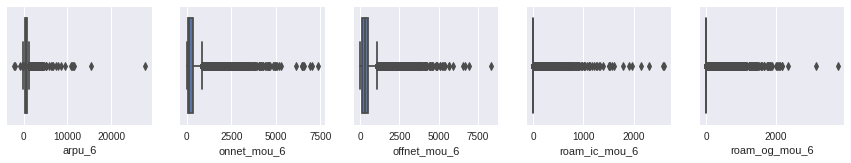

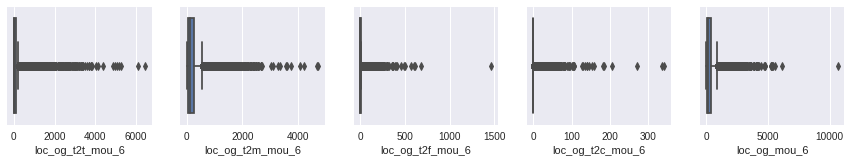

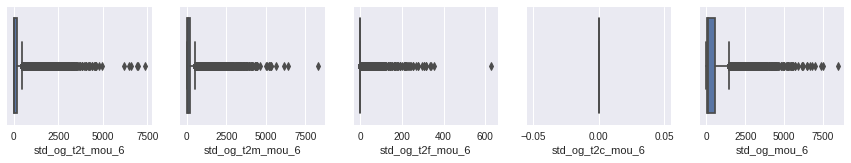

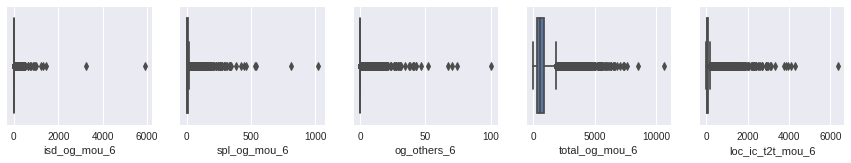

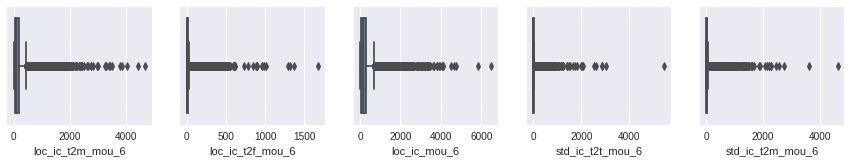

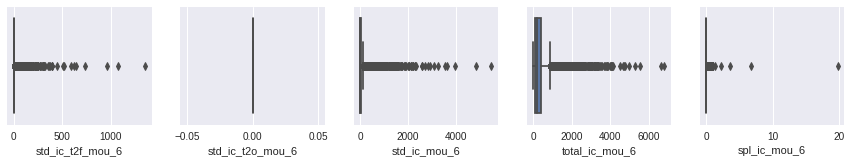

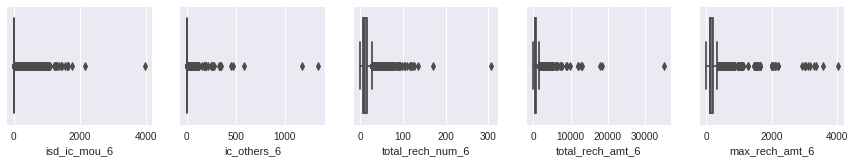

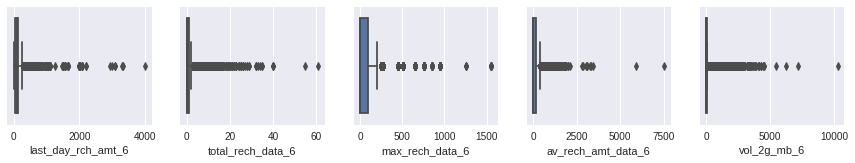

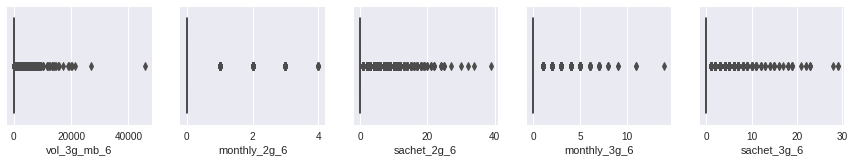

In [29]:
# Checking outliers in month 6 columns
cols = [col for col in hv_cus.columns if col.endswith('6')]
i=0
while i < 45:
    fig = plt.figure(figsize=[15,10])
    plt.subplot(4,5,1)
    sns.boxplot(x=cols[i], data=hv_cus)
    i += 1
    plt.subplot(4,5,2)
    sns.boxplot(x=cols[i], data=hv_cus)
    i += 1
    plt.subplot(4,5,3)
    sns.boxplot(x=cols[i], data=hv_cus)
    i += 1
    plt.subplot(4,5,4)
    sns.boxplot(x=cols[i], data=hv_cus)
    i += 1
    plt.subplot(4,5,5)
    sns.boxplot(x=cols[i], data=hv_cus)
    i += 1
    plt.show()

Based on above boxplots its clear that most of the numerical columns are skewed, so to convert these features into normal distribution we need to perform power transformation.

In [30]:
from sklearn.preprocessing import PowerTransformer
# Performing power transformation for dealing with skewness
power = PowerTransformer(method='yeo-johnson', standardize=True)
hv_cus_pow = pd.DataFrame(power.fit_transform(hv_cus.iloc[:,:-1]),columns=hv_cus.columns[:-1])
hv_cus_pow.columns = hv_cus.columns[:-1]
# Appennding 'churn' column to 'hv_cus_pow'
hv_cus_pow['churn'] = hv_cus['churn']

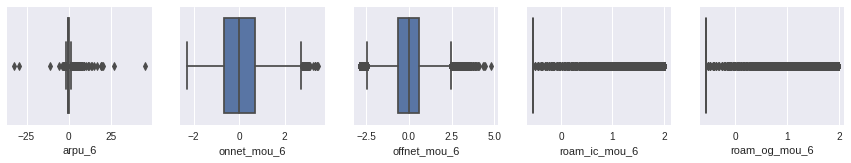

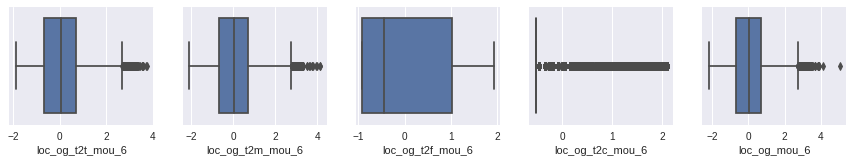

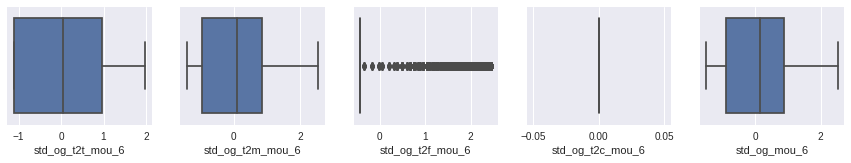

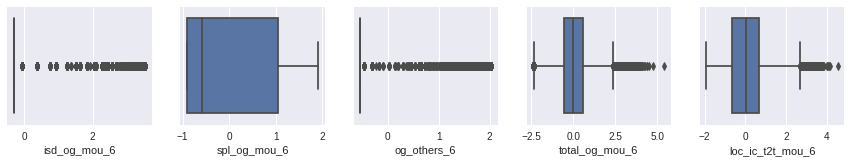

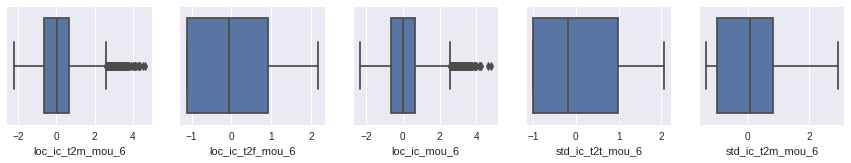

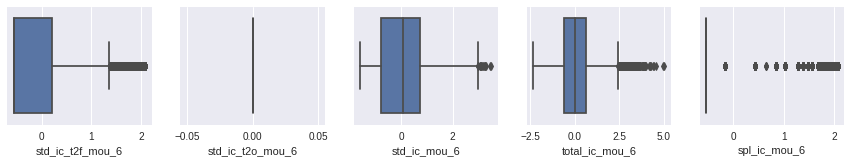

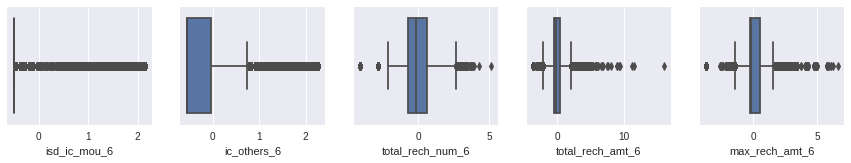

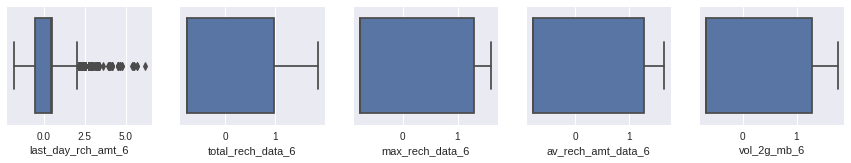

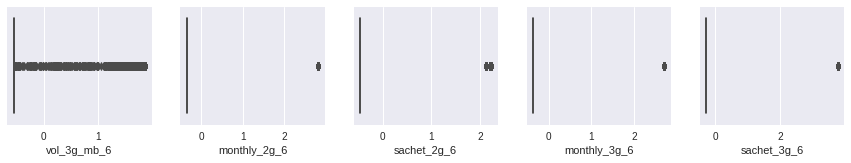

In [31]:
cols = [col for col in hv_cus.columns if col.endswith('6')]
i=0
while i < 45:
    fig = plt.figure(figsize=[15,10])
    plt.subplot(4,5,1)
    sns.boxplot(x=cols[i], data=hv_cus_pow)
    i += 1
    plt.subplot(4,5,2)
    sns.boxplot(x=cols[i], data=hv_cus_pow)
    i += 1
    plt.subplot(4,5,3)
    sns.boxplot(x=cols[i], data=hv_cus_pow)
    i += 1
    plt.subplot(4,5,4)
    sns.boxplot(x=cols[i], data=hv_cus_pow)
    i += 1
    plt.subplot(4,5,5)
    sns.boxplot(x=cols[i], data=hv_cus_pow)
    i += 1
    plt.show()

# **3. Exploratory Data Analysis**

## **a) Univariate Analysis**

**Inference:** Above plot shows that the target classes are not uniformly distributed. Class imbalance will be treated at later stage using SMOTE technique.


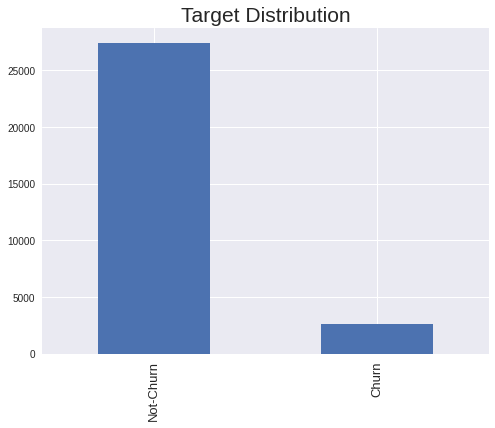

In [32]:
# Target Class Distribution
plt.figure(figsize=[8,6])
hv_cus_pow['churn'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2), ('Not-Churn', 'Churn'),fontsize= 13)
plt.title('Target Distribution',fontdict = {'fontsize': 21})
plt.show()

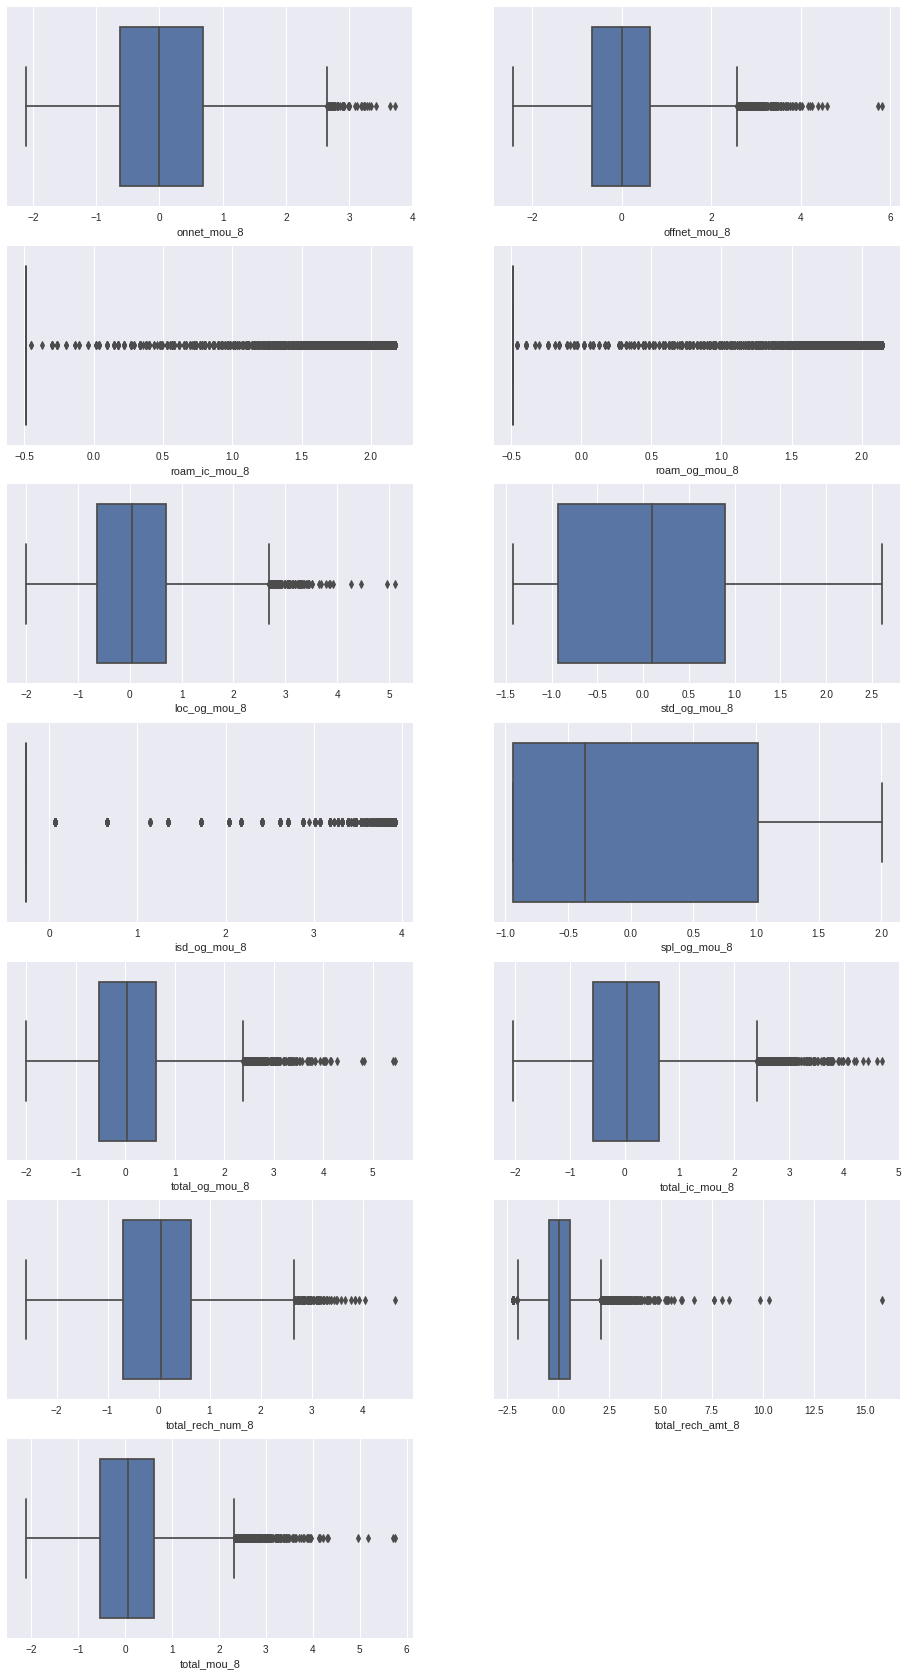

In [33]:
num_features = ['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_mou_8','std_og_mou_8','isd_og_mou_8',
        'spl_og_mou_8','total_og_mou_8','total_ic_mou_8','total_rech_num_8','total_rech_amt_8','total_mou_8']
r = c = 0
fig,ax = plt.subplots(7,2,figsize=(16,30))
# Checking distribution of numerical columns post transformation 
for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=hv_cus_pow,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

## **b) Bivariate Analysis**

### **i) Categorical - Numerical**

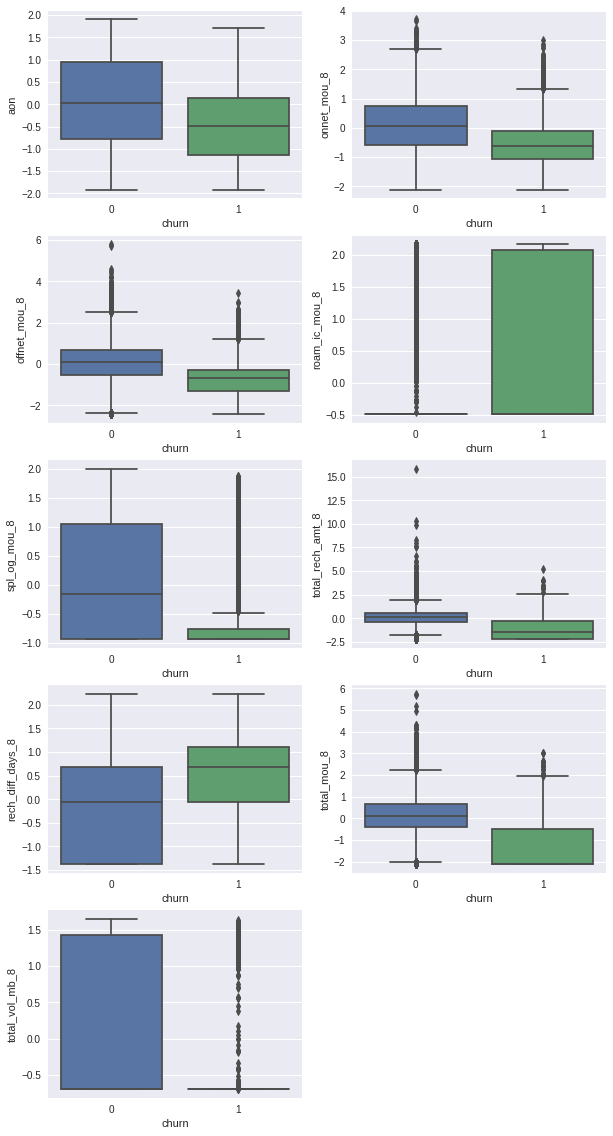

In [34]:
cols = ['aon', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8','spl_og_mou_8', 'total_rech_amt_8', 'rech_diff_days_8', 'total_mou_8','total_vol_mb_8']

r = c = 0
fig,ax = plt.subplots(5,2,figsize=(10,20))

for n,i in enumerate(cols):
    sns.boxplot(x='churn',y=i, data=hv_cus_pow,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

### **ii) Numerical-Numerical**

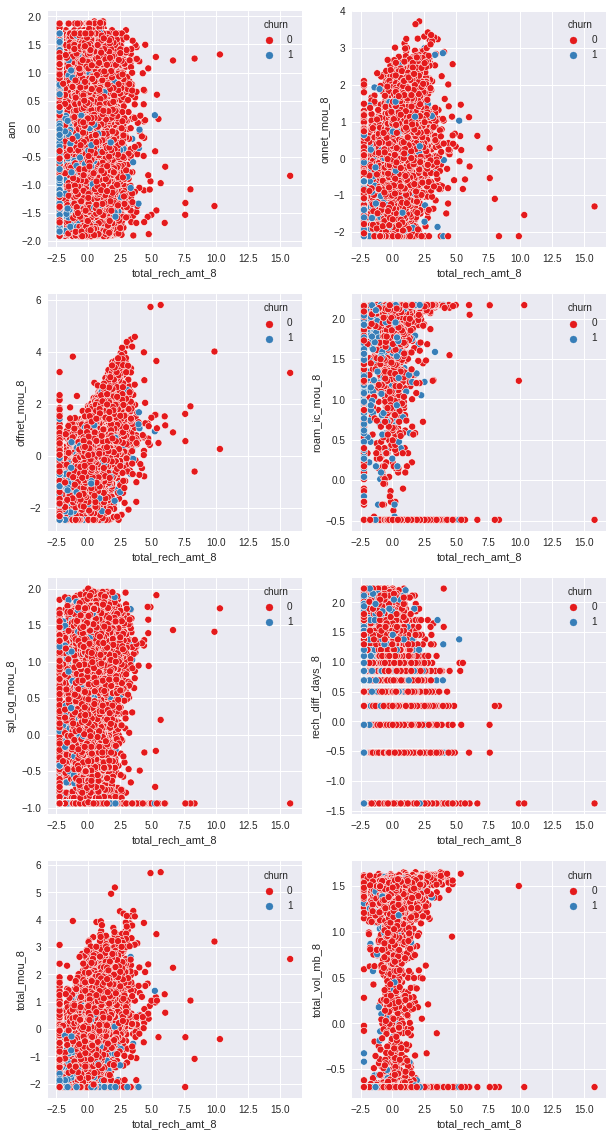

In [35]:
cols = ['aon', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8','spl_og_mou_8', 'rech_diff_days_8', 'total_mou_8','total_vol_mb_8']

r = c = 0
fig,ax = plt.subplots(4,2,figsize=(10,20))

for n,i in enumerate(cols):
    sns.scatterplot(x='total_rech_amt_8', y=i, hue=hv_cus_pow['churn'], data=hv_cus_pow, palette="Set1",ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
#ax[r,c].axis("off")
plt.show()

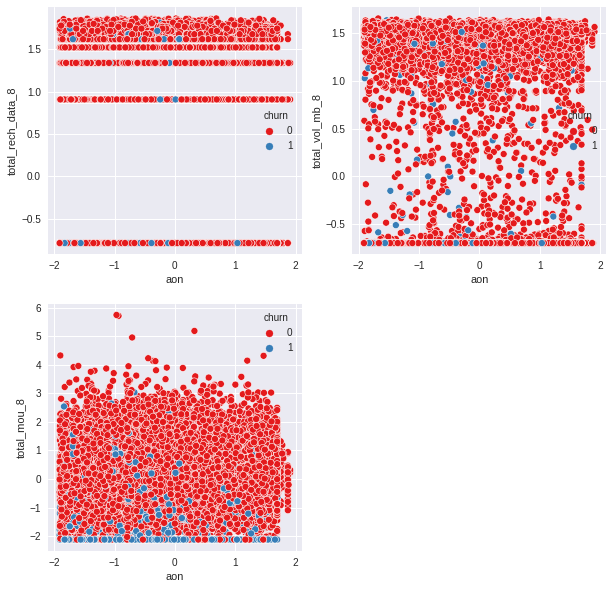

In [36]:
cols = ['total_rech_data_8','total_vol_mb_8', 'total_mou_8']

r = c = 0
fig,ax = plt.subplots(2,2,figsize=(10,10))

for n,i in enumerate(cols):
    sns.scatterplot(x='aon', y=i, hue=hv_cus_pow['churn'], data=hv_cus_pow, palette="Set1",ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

## **c) Multivariate Analysis**

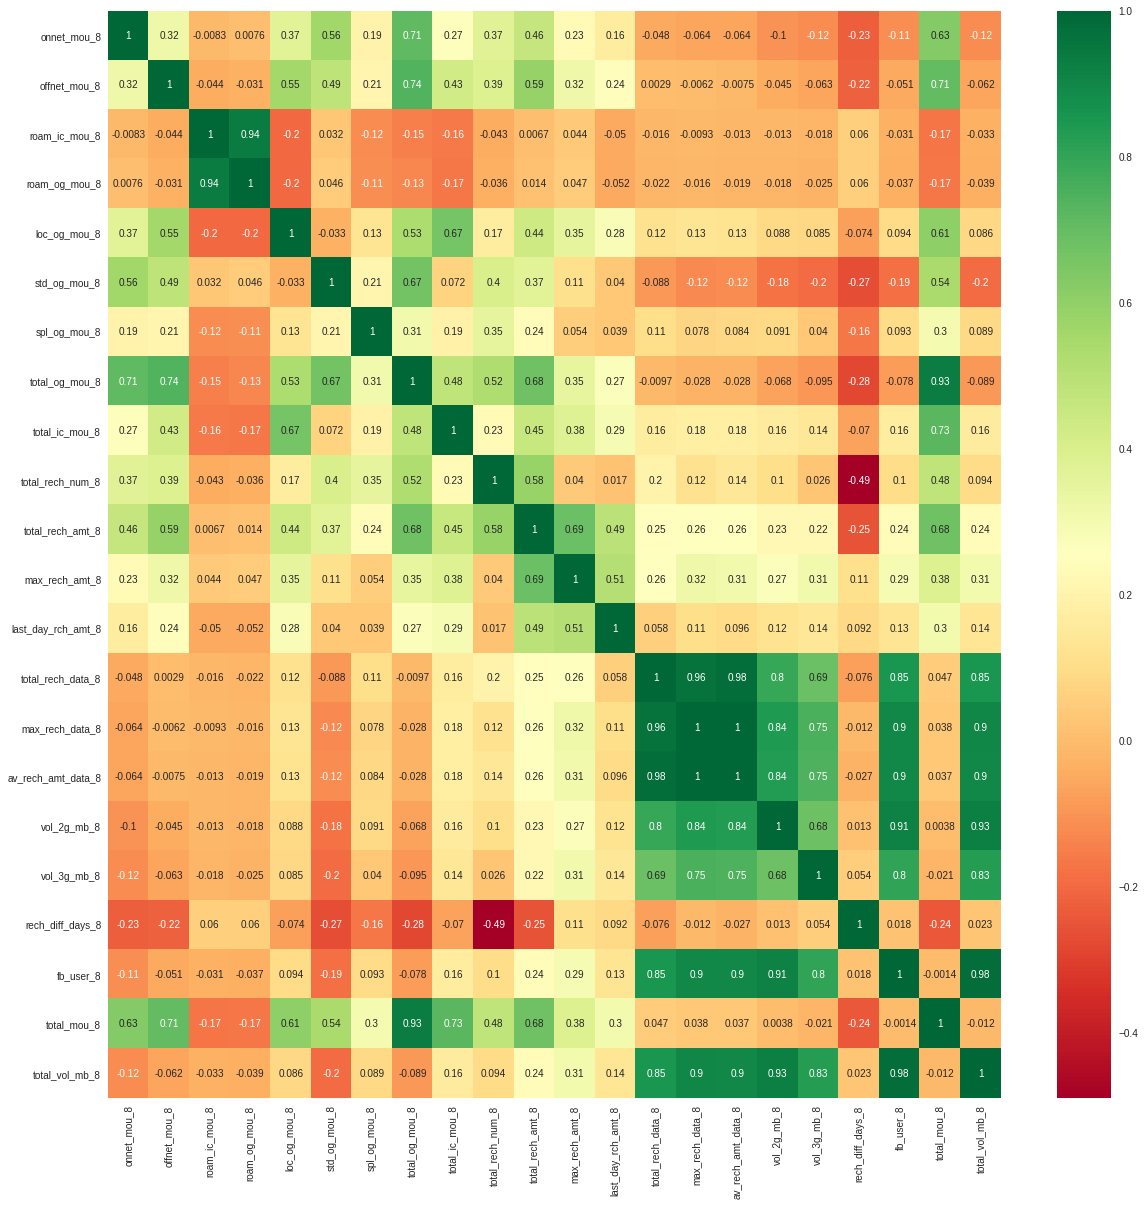

In [37]:
cols = ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 
        'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'rech_diff_days_8', 
        'fb_user_8', 'total_mou_8', 'total_vol_mb_8']
plt.figure(figsize=[20,20])
sns.heatmap(hv_cus_pow[cols].corr(), cmap='RdYlGn', annot=True)
plt.show()

**Inferences:**

-	When it comes to comparing age on network, new customers are more likely to churn when compared to the old ones, although the overall difference is not significant

-	Special outgoing calls are made by customers that are less likely to churn

-	Total mobile internet usage volume is on an average lesser for churners than non-churners

-	Churners receive more incoming roaming calls

-	When comparing total minutes of usage between two groups, churners are less active than non-churners in broader sense

-	Number of days between the next recharge is more for churners than non-churners when we compare the 25,50 and 75 percentiles

-	Whether the calls are within the same operator or outside the operator network, non-churners make more calls than churners which reflects that non-churners are active on the call services than churners

# **4. Data Preparation**

## **a) Train-Test Split**

In [39]:
from sklearn.model_selection import train_test_split

X = hv_cus_pow.drop('churn',axis=1)
y = hv_cus_pow[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=45)
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (20985, 152)
X_test shape (8994, 152)
y_train shape (20985, 1)
y_test shape (8994, 1)


## **b) Dealing with class imbalance**

In [40]:
from imblearn.over_sampling import SMOTE
# Generating synthetic samples using SMOTE analysis
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Class distribution train (pre-SMOTE)\n",y_train.value_counts())
print("\nClass distribution train (post-SMOTE)\n",pd.Series(y_smote).value_counts())

Class distribution train (pre-SMOTE)
 churn
0        19166
1         1819
dtype: int64

Class distribution train (post-SMOTE)
 1    19166
0    19166
dtype: int64


## **c) Scaling Indepentent variables**

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_smote), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## **d) Dimensionality Reduction using PCA for high performance models**

In [42]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

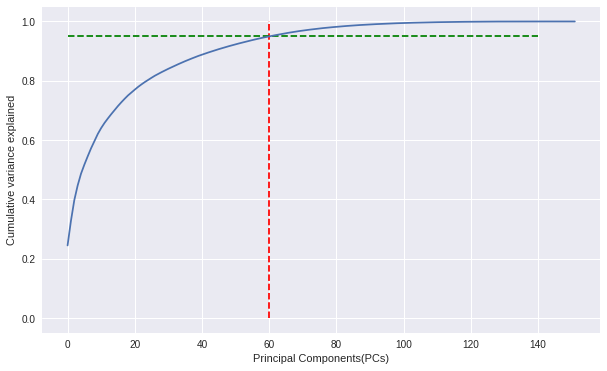

In [43]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
# Plotting graph between CVE vs PCs 
fig = plt.figure(figsize=[10,6])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("Principal Components(PCs)")
plt.ylabel("Cumulative variance explained")
plt.show()

Based on abive plot **60** seems to be the optimal number of PCs for training high accuracy models.

In [44]:
from sklearn.decomposition import IncrementalPCA
# Performing PCA decomposition on Train data
pca_final = IncrementalPCA(n_components=60)
X_train_pca = pca_final.fit_transform(X_train_scaled)
print("X_train_pca shape: ",X_train_pca.shape)

X_train_pca shape:  (38332, 60)


In [45]:
# Performing PCA decomposition on Test data
X_test_pca = pca_final.transform(X_test_scaled)
print("X_test_pca shape: ",X_test_pca.shape)

X_test_pca shape:  (8994, 60)


## **e) Feature Selection using RFE for explainable model**

In [46]:
from sklearn.linear_model import LogisticRegression
# Selecting top 20 features RFE for logistic regression model
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_scaled,y_smote)
rfe_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),columns= ['index','RFE_Support','RFE_rank'])
display(rfe_df[rfe_df.RFE_Support])

,index,RFE_Support,RFE_rank
0,arpu_6,True,1
1,arpu_7,True,1
7,offnet_mou_7,True,1
14,roam_og_mou_8,True,1
43,std_og_mou_7,True,1
44,std_og_mou_8,True,1
55,total_og_mou_7,True,1
56,total_og_mou_8,True,1
68,loc_ic_mou_8,True,1
86,total_ic_mou_8,True,1


In [47]:
rfe_features = X_train.columns[rfe.support_].to_list()
len(rfe_features)

20

# **5. Model Building**

## **a) Custom functions**

In [48]:
from sklearn.model_selection import RandomizedSearchCV

def hyper_tuner(model, param_grid):
  '''
  Function returns the best set of parameters from 'param_grid' dictionary for provided model. 
  '''
  rs = RandomizedSearchCV(estimator = model, param_distributions = param_grid,
                           cv = 3)
  rs.fit(X_train_pca,y_smote)
  return rs.best_params_

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

def tc_model(model,model_name):
    '''
    Function for training and evaluating the model.
    '''
    if model_name == 'Logestic Regression':
      # Explainable Model
      model.fit(X_train_scaled[rfe_features],y_smote)
      X_test_temp = X_test_scaled[rfe_features]
      print("Used RFE for feature selection")
      y_test_pred = model.predict(X_test_temp)
    
    else :
      # High Performance Model
      model.fit(X_train_pca,y_smote)
      X_test_temp = X_test_pca
      print("Used PCA for feature decomposition")
      y_test_pred = model.predict(X_test_pca)

    # Calculating Evaluation Metrics
    s1 = accuracy_score(y_test,y_test_pred)
    print(f"{model_name} Accuracy :{round(s1*100,2)}%\n")
    print(classification_report(y_test,y_test_pred))

    
    # Plotting Confusion Matrix and ROC curve
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='d',cbar=False,cmap='Blues',ax=ax[0])
    ax[0].set_title("Confusion Matrix",fontsize=16)
    labels = ["Not Churn","Churn"]
    ax[0].set_xticks(np.arange(2))
    ax[0].set_yticks(np.arange(2))
    ax[0].set_xticklabels(labels)
    ax[0].set_yticklabels(labels)
    plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax[0].grid(False)
    
    plot_roc_curve(model,X_test_temp,y_test,ax=ax[1])
    ax[1].set_title("ROC Curve",fontsize=16)
    plt.show()

## **a) Explainable Model**

Used RFE for feature selection
Logestic Regression Accuracy :87.31%

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8224
           1       0.39      0.83      0.53       770

    accuracy                           0.87      8994
   macro avg       0.69      0.85      0.73      8994
weighted avg       0.93      0.87      0.89      8994



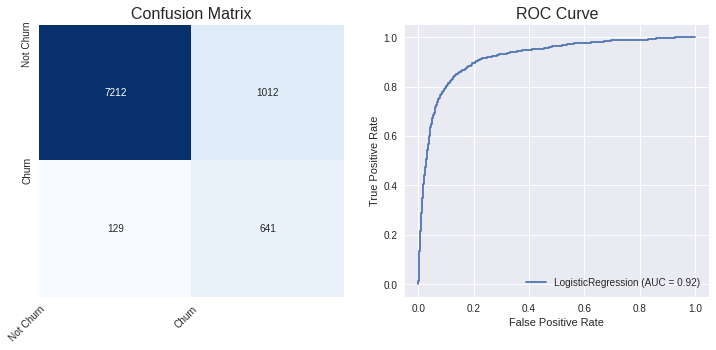

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)
tc_model(lr,"Logestic Regression")

**Interpreting significance of coefficients in logistic regression.**

In [59]:
print(abs(lr.coef_).ravel())
print(rfe_features)

[ 2.4748822   4.67264426  1.457201    1.71376296  1.33525275  2.99755043
  5.00615045  4.11010044  4.87072854 11.59281634  1.87632638  3.1919261
  4.03849105  2.46010853  1.86799181  4.48791325  2.80170639  3.18430829
  7.7329984   2.58568525]
['arpu_6', 'arpu_7', 'offnet_mou_7', 'roam_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'sep_vbc_3g', 'rech_diff_days_8', 'total_mou_7', 'total_mou_8']


In [52]:
lr.fit(X_train_scaled[rfe_features],y_smote)
lr_coeff = pd.DataFrame(data={'rfe_features': rfe_features,'coefficient_abs': abs(lr.coef_).ravel()})
lr_coeff.sort_values('coefficient_abs',ascending=False)

,rfe_features,coefficient_abs
9,total_ic_mou_8,11.592816
18,total_mou_7,7.732998
6,total_og_mou_7,5.006150
8,loc_ic_mou_8,4.870729
1,arpu_7,4.672644
15,last_day_rch_amt_8,4.487913
7,total_og_mou_8,4.110100
12,total_rech_amt_7,4.038491
11,total_rech_amt_6,3.191926
17,rech_diff_days_8,3.184308


**Inference:**

Based on absolute value of coefficients it seems that 'spl' i.e. Special calls, 'roam' i.e. roaming calls, 'max_rech_amt', 'offnet' i.e. calls to outside T network and 'total_mou' are good contributors in predicting "Churn rate". Similar trend was observed in EDA as well.

## **b) High Accuracy Models**

- RandomForest
- DecisionTree
- SVM

### **Random Forest Classifier**

Hyperparameter Tuning

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Number of trees in Random forest
n_estimators=list(range(100,300,100))
# Maximum number of levels in a tree
max_depth = list(range(4,9,4))

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth
}

params = hyper_tuner(RandomForestClassifier(n_jobs=-1),param_grid)
print("Best Parameters:",params)

Best Parameters: {'n_estimators': 200, 'max_depth': 8}


Building/Evaluating RandomForest classifier

Used PCA for feature decomposition
RandomForest Accuracy :88.43%

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8224
           1       0.40      0.68      0.50       770

    accuracy                           0.88      8994
   macro avg       0.68      0.79      0.72      8994
weighted avg       0.92      0.88      0.90      8994



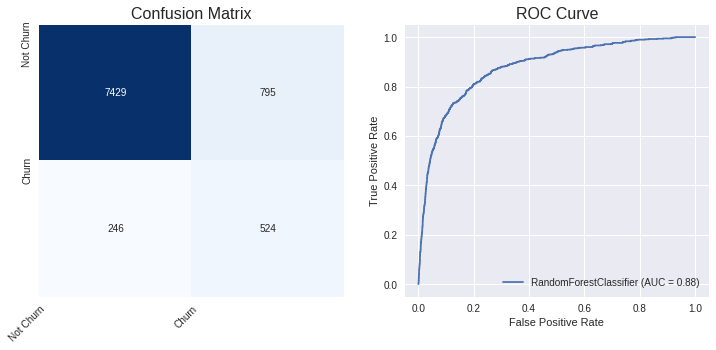

In [54]:
rf = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'])

tc_model(rf,"RandomForest")

### **Decision Tree Classifier**

Hyperparameter Tuning

In [55]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
        'min_samples_leaf': [2,5,7],
        'min_samples_split': list(range(2,9,2)),
        'max_depth': list(range(4,13,4))
        }

params = hyper_tuner(DecisionTreeClassifier(),param_grid)
print("Best Parameters:",params)

Best Parameters: {'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 12}


Building/Evaluating DecisionTree classifier

Used PCA for feature decomposition
Decision Tree Accuracy :83.39%

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      8224
           1       0.29      0.65      0.40       770

    accuracy                           0.83      8994
   macro avg       0.63      0.75      0.65      8994
weighted avg       0.91      0.83      0.86      8994



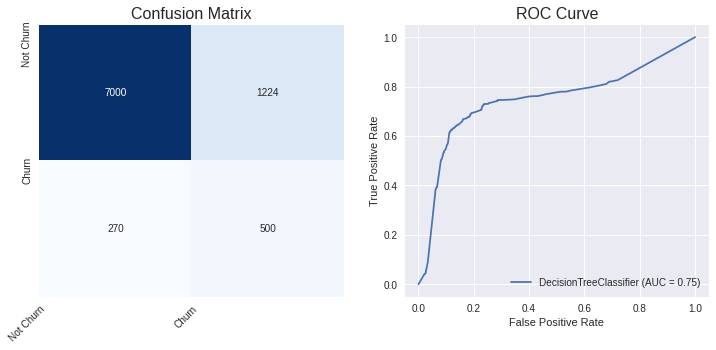

In [56]:
dt = DecisionTreeClassifier(min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf']  
                            , max_depth=params['max_depth'])
tc_model(dt,"Decision Tree")

### **SVM**

Hyperparameter Tuning

In [57]:
from sklearn.svm import SVC

# Number of trees in Random forest
C = [0.1, 1, 10]

# Hyperparameters dict
param_grid = {"C":C}

params = hyper_tuner(SVC(),param_grid)
print("Best Parameters:",params)

Best Parameters: {'C': 10}


Building/Evaluating SVM model

Used PCA for feature decomposition
SVM Accuracy :92.52%

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8224
           1       0.56      0.60      0.58       770

    accuracy                           0.93      8994
   macro avg       0.76      0.78      0.77      8994
weighted avg       0.93      0.93      0.93      8994



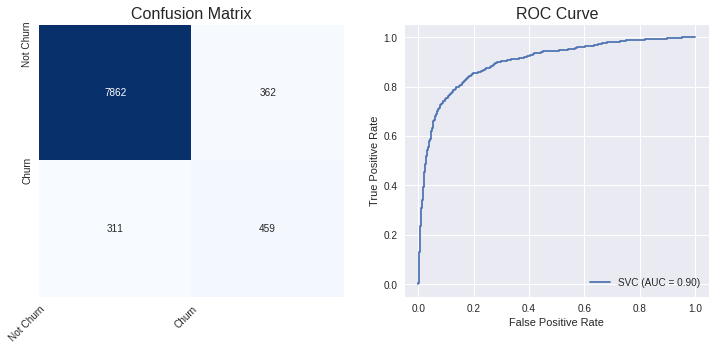

In [58]:
sv = SVC(params["C"])
tc_model(sv,"SVM")

**Remark:** Unable to find any data leakage. Please share feedback if any irregularities were observed.

# **6. Recommendations**

**Recommendations:**

- Company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- Users with frequent recharge cycle have higher tendency to churn. This is probably due fewer services being offered in lower packages. 
- To deal above stated issues, they should launch more services at competative prices and provide offers on special services like roaming, ISD calls, etc.